In [30]:

import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in round  brackets, remove new line character, remove punctuation and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub(r'\(.*?\)', '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[%s]' % re.escape(r"""!"#$%&'()*+,-./:;<=>?@[\]^`{|}~"""), '', text)
    text = re.sub(r'[·–‘’“”…]', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'\s{2,}', ' ', text)
    return text.strip()

def clean_text_round0(text):
    text = re.sub(r'[%s]' % re.escape(r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', text)
    return text

def clean_text_round2(text):
    '''Remove imojis'''
    # Mẫu regex để khớp với các emoji dựa trên các mã Unicode
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U0001FAA0-\U0001FAAF"  # Symbols for Legacy Computing
                           u"\U0001F004-\U0001F0CF"  # Miscellaneous Symbols and Pictographs
                           u"\U0001F170-\U0001F251"  # Enclosed Alphanumeric Supplement
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', str(text))

def clean_text_round3(text):
    '''Remove chinese chracters'''
    text = re.sub(r'[\u4e00-\u9fff]', '', text)
    return text

def clean_text_round4(text):
    '''remove links'''
    # Define a regular expression pattern for matching links
    link_pattern = re.compile(r'https?://\S+|www\.\S+')

    # Use sub to replace links with an empty string
    cleaned_text = re.sub(link_pattern, '', text)

    return cleaned_text



def clean_text_round6(text):
    stop_words = list()
    with open(r'E:\NAM5KI2\TrinhSat\BTL\codehethong\app\admin\keyword_extractor\vietnamese-stopwords-dash.txt', 'r', encoding="utf-8") as file:
        lines = file.readlines()
        stop_words = [line.strip() for line in lines]
    '''Remove stop words'''
    # Create a regex pattern to match stop words
    pattern = r'\b(?:' + '|'.join(map(re.escape, stop_words)) + r')\b'
    text = re.sub(pattern, '', text, flags=re.IGNORECASE)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()



In [34]:
import json
documents = []

with open(r"E:\NAM5KI2\TrinhSat\BTL\codehethong\app\admin\keyword_extractor\result.json", "r", encoding="utf-8") as f:
    data = json.load(f) 
    
documents = [item['content'] for item in data]

print ("Number of documents: ", len(documents))
data = ""
for item in documents:
    data += item


Number of documents:  71


In [3]:

import py_vncorenlp
import os

model_dir = os.path.abspath('./vncorenlp')
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
py_vncorenlp.download_model(save_dir=os.path.abspath('./vncorenlp'))
py_vncorenlp.download_model(save_dir=model_dir)
rdrsegmenter = py_vncorenlp.VnCoreNLP(annotators=["wseg"], save_dir=model_dir)



VnCoreNLP model folder e:\NAM5KI2\TrinhSat\BTL\codehethong\app\admin\keyword_extractor\vncorenlp\vncorenlp already exists! Please load VnCoreNLP from this folder!
VnCoreNLP model folder e:\NAM5KI2\TrinhSat\BTL\codehethong\app\admin\keyword_extractor\vncorenlp\vncorenlp already exists! Please load VnCoreNLP from this folder!


ValueError: VM is already running, can't set classpath/options; VM started at  File "C:\Users\CHU-TUAN-KIET\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\CHU-TUAN-KIET\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "e:\NAM5KI2\TrinhSat\BTL\codehethong\env\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "e:\NAM5KI2\TrinhSat\BTL\codehethong\env\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "e:\NAM5KI2\TrinhSat\BTL\codehethong\env\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start()
  File "e:\NAM5KI2\TrinhSat\BTL\codehethong\env\lib\site-packages\tornado\platform\asyncio.py", line 205, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\CHU-TUAN-KIET\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 596, in run_forever
    self._run_once()
  File "C:\Users\CHU-TUAN-KIET\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 1890, in _run_once
    handle._run()
  File "C:\Users\CHU-TUAN-KIET\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "e:\NAM5KI2\TrinhSat\BTL\codehethong\env\lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
    await self.process_one()
  File "e:\NAM5KI2\TrinhSat\BTL\codehethong\env\lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one
    await dispatch(*args)
  File "e:\NAM5KI2\TrinhSat\BTL\codehethong\env\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
    await result
  File "e:\NAM5KI2\TrinhSat\BTL\codehethong\env\lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request
    await super().execute_request(stream, ident, parent)
  File "e:\NAM5KI2\TrinhSat\BTL\codehethong\env\lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
    reply_content = await reply_content
  File "e:\NAM5KI2\TrinhSat\BTL\codehethong\env\lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute
    res = shell.run_cell(
  File "e:\NAM5KI2\TrinhSat\BTL\codehethong\env\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
    return super().run_cell(*args, **kwargs)
  File "e:\NAM5KI2\TrinhSat\BTL\codehethong\env\lib\site-packages\IPython\core\interactiveshell.py", line 3048, in run_cell
    result = self._run_cell(
  File "e:\NAM5KI2\TrinhSat\BTL\codehethong\env\lib\site-packages\IPython\core\interactiveshell.py", line 3103, in _run_cell
    result = runner(coro)
  File "e:\NAM5KI2\TrinhSat\BTL\codehethong\env\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
    coro.send(None)
  File "e:\NAM5KI2\TrinhSat\BTL\codehethong\env\lib\site-packages\IPython\core\interactiveshell.py", line 3308, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "e:\NAM5KI2\TrinhSat\BTL\codehethong\env\lib\site-packages\IPython\core\interactiveshell.py", line 3490, in run_ast_nodes
    if await self.run_code(code, result, async_=asy):
  File "e:\NAM5KI2\TrinhSat\BTL\codehethong\env\lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\CHU-TUAN-KIET\AppData\Local\Temp\ipykernel_16476\3223634911.py", line 9, in <module>
    rdrsegmenter = py_vncorenlp.VnCoreNLP(annotators=["wseg"], save_dir=model_dir)
  File "e:\NAM5KI2\TrinhSat\BTL\codehethong\env\lib\site-packages\py_vncorenlp\vncorenlp.py", line 53, in __init__
    from jnius import autoclass
  File "<frozen importlib._bootstrap>", line 1007, in _find_and_load
  File "<frozen importlib._bootstrap>", line 986, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 680, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "e:\NAM5KI2\TrinhSat\BTL\codehethong\env\lib\site-packages\jnius\__init__.py", line 36, in <module>
    from .reflect import *  # noqa
  File "<frozen importlib._bootstrap>", line 1007, in _find_and_load
  File "<frozen importlib._bootstrap>", line 986, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 680, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "e:\NAM5KI2\TrinhSat\BTL\codehethong\env\lib\site-packages\jnius\reflect.py", line 19, in <module>
    class Class(JavaClass, metaclass=MetaJavaClass):


In [19]:
doc_segmented = rdrsegmenter.word_segment(data)
doc_segmented

['\' Tứ_trụ \' Việt_Nam : Cơ_hội của bà Trương_Thị_Mai và tham_vọng của Đại_tướng Tô_Lâm_Chụp lại hình_ảnh , Bà Trương_Thị_Mai và ông Tô_Lâm , những nhân_vật " trung_tâm " trên chính_trường Việt_Nam hiện_nay . 30 phút trước Chủ_tịch Quốc_hội Vương_Đình_Huệ và Chủ_tịch nước Võ_Văn_Thưởng mất chức chỉ cách nhau hơn một tháng .',
 '“ Tứ_Trụ ” Việt_Nam nay chỉ còn hai người , chính_trường Việt_Nam sẽ có những diễn_biến thế_nào ?',
 'Chủ_tịch Quốc_hội là một vị_trí nằm trong “ Tứ_Trụ ” , bên cạnh tổng_bí_thư , chủ_tịch nước và thủ_tướng .',
 'Giáo_sư Zachary_Abuza từ_trường National_War_College , Đại_học National_Defense ( Mỹ ) , nhận_định với BBC rằng chủ_tịch Quốc_hội là vị_trí " vô_cùng quan_trọng cho tính chính_danh của Đảng " .',
 '" Tôi nghĩ sẽ rất khó để đất_nước vận_hành mà không có chủ_tịch Quốc_hội khi mà luật và các quy_định cần được thông_qua .',
 'Việc không có chủ_tịch Quốc_hội sẽ gửi một tín_hiệu rất xấu đến các nhà_đầu_tư nước_ngoài , " ông Abuza nói .',
 'Dựa trên Quy_định 

In [24]:
clean_text_round1(doc_segmented)

'tứ_trụ việt_nam cơ_hội của bà trương_thị_mai và tham_vọng của đại_tướng tô_lâm_chụp lại hình_ảnh bà trương_thị_mai và ông tô_lâm những nhân_vật trung_tâm trên chính_trường việt_nam hiện_nay phút trước chủ_tịch quốc_hội vương_đình_huệ và chủ_tịch nước võ_văn_thưởng mất chức chỉ cách nhau hơn một tháng tứ_trụ việt_nam nay chỉ còn hai người chính_trường việt_nam sẽ có những diễn_biến thế_nào chủ_tịch quốc_hội là một vị_trí nằm trong tứ_trụ bên cạnh tổng_bí_thư chủ_tịch nước và thủ_tướng giáo_sư zachary_abuza từ_trường national_war_college đại_học national_defense nhận_định với bbc rằng chủ_tịch quốc_hội là vị_trí vô_cùng quan_trọng cho tính chính_danh của đảng tôi nghĩ sẽ rất khó để đất_nước vận_hành mà không có chủ_tịch quốc_hội khi mà luật và các quy_định cần được thông_qua việc không có chủ_tịch quốc_hội sẽ gửi một tín_hiệu rất xấu đến các nhà_đầu_tư nước_ngoài ông abuza nói dựa trên quy_định qđ tw về khung tiêu_chuẩn cho các chức_danh thì một trong những điều_kiện để trở_thành chủ_tị

('việt_nam', 'hình_ảnh', 'mỹ', 'vinfast', 'trung_quốc', 'chủ_tịch', 'vụ', 'vàng', 'đảng', 'quốc_hội', 'công_ty', 'ngân_hàng', 'chụp', 'thông_tin', 'dự_án', 'đi', 'nhà_nước', 'kênh', 'campuchia', 'scb', 'bbc', 'tiền', 'sông', 'quy_định', 'hoạt_động', 'quốc_gia', 'trung_ương', 'bộ_chính_trị', 'phim', 'đầu', 'đầu_tư', 'vương_đình_huệ', 'kinh_tế', 'tham_nhũng', 'tập_đoàn', 'chính_phủ', 'án', 'getty_images_chụp', 'quốc_tế', 'báo', 'thái_lan', 'thị_trường', 'việt', 'đồng', 'phó', 'uỷ_viên', 'thủ_tướng', 'tổ_chức', 'giá', 'đào') (1004, 443, 288, 281, 269, 240, 211, 206, 187, 181, 180, 175, 156, 155, 152, 151, 149, 148, 148, 146, 145, 141, 139, 137, 134, 133, 132, 128, 123, 121, 119, 117, 117, 116, 115, 110, 107, 105, 103, 102, 102, 101, 100, 100, 99, 98, 97, 97, 95, 94)


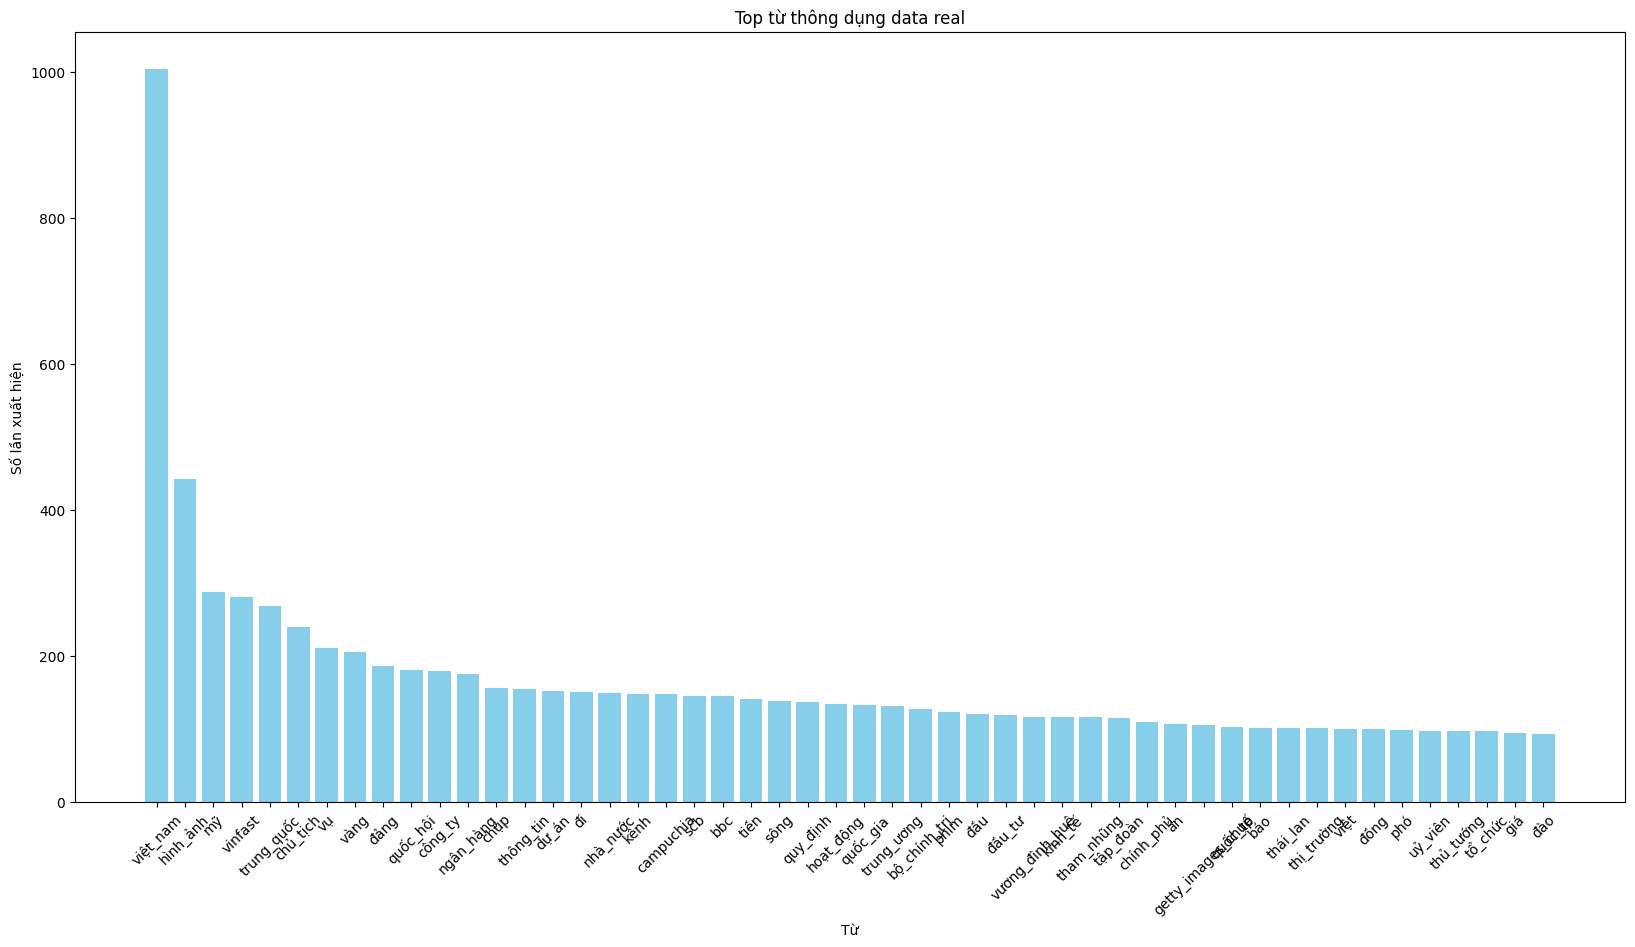

In [25]:
from collections import Counter
import matplotlib.pyplot as plt

temp1 = clean_text_round4(clean_text_round3(clean_text_round2(clean_text_round1(doc_segmented))))
temp = clean_text_round6(temp1).split(" ")


word_counts_real = Counter(temp)

# Lấy ra top 50 từ thông dụng nhất
top_words = word_counts_real.most_common(50)

# Chia thành 2 list: từ và tần suất
words, counts = zip(*top_words)
print(words, counts)
# Vẽ biểu đồ cột
plt.figure(figsize=(20, 10))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Từ')
plt.ylabel('Số lần xuất hiện')
plt.title('Top từ thông dụng trên viettan')
plt.xticks(rotation=45)  # Để xoay nhãn trục x nếu cần
plt.show()

In [ ]:
label = ['việt_nam', 'hình_ảnh', 'mỹ', 'vinfast', 'trung_quốc', 'chủ_tịch', 'vụ', 'vàng', 'đảng', 'quốc_hội', 'công_ty', 'ngân_hàng', 'chụp', 'thông_tin', 'dự_án', 'đi', 'nhà_nước', 'kênh', 'campuchia', 'scb', 'bbc', 'tiền', 'sông', 'quy_định', 'hoạt_động', 'quốc_gia', 'trung_ương', 'bộ_chính_trị', 'phim', 'đầu', 'đầu_tư', 'vương_đình_huệ', 'kinh_tế', 'tham_nhũng', 'tập_đoàn', 'chính_phủ', 'án', 'getty_images_chụp', 'quốc_tế', 'báo', 'thái_lan', 'thị_trường', 'việt', 'đồng', 'phó', 'uỷ_viên', 'thủ_tướng', 'tổ_chức', 'giá', 'đào']
data = [1004, 443, 288, 281, 269, 240, 211, 206, 187, 181, 180, 175, 156, 155, 152, 151, 149, 148, 148, 146, 145, 141, 139, 137, 134, 133, 132, 128, 123, 121, 119, 117, 117, 116, 115, 110, 107, 105, 103, 102, 102, 101, 100, 100, 99, 98, 97, 97, 95, 94]




In [31]:
temp

['tứ_trụ',
 'việt_nam',
 'trương_thị_mai',
 'tham_vọng',
 'đại_tướng',
 'tô_lâm_chụp',
 'hình_ảnh',
 'trương_thị_mai',
 'tô_lâm',
 'nhân_vật',
 'trung_tâm',
 'chính_trường',
 'việt_nam',
 'phút',
 'chủ_tịch',
 'quốc_hội',
 'vương_đình_huệ',
 'chủ_tịch',
 'võ_văn_thưởng',
 'chức',
 'tứ_trụ',
 'việt_nam',
 'chính_trường',
 'việt_nam',
 'diễn_biến',
 'chủ_tịch',
 'quốc_hội',
 'nằm',
 'tứ_trụ',
 'cạnh',
 'tổng_bí_thư',
 'chủ_tịch',
 'thủ_tướng',
 'giáo_sư',
 'zachary_abuza',
 'từ_trường',
 'national_war_college',
 'đại_học',
 'national_defense',
 'nhận_định',
 'bbc',
 'chủ_tịch',
 'quốc_hội',
 'vô_cùng',
 'chính_danh',
 'đảng',
 'đất_nước',
 'vận_hành',
 'chủ_tịch',
 'quốc_hội',
 'luật',
 'quy_định',
 'thông_qua',
 'chủ_tịch',
 'quốc_hội',
 'gửi',
 'tín_hiệu',
 'xấu',
 'nhà_đầu_tư',
 'nước_ngoài',
 'abuza',
 'dựa',
 'quy_định',
 'qđ',
 'tw',
 'khung',
 'tiêu_chuẩn',
 'chức_danh',
 'chủ_tịch',
 'quốc_hội',
 'tham_gia',
 'bộ_chính_trị',
 'trọn',
 'nhiệm_kỳ',
 'trở',
 'hiến_pháp',
 'chủ_tịch'

In [36]:
import matplotlib.pyplot as plt
# Let's make some word clouds!
from wordcloud import WordCloud

stop_words = list()
with open(r'E:\NAM5KI2\TrinhSat\BTL\codehethong\app\admin\keyword_extractor\vietnamese-stopwords-dash.txt', 'r', encoding="utf-8") as file:
    lines = file.readlines()
    stop_words = [line.strip() for line in lines]


wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

plt.figure(figsize=(20, 10))
# data = ""
# title = "word cloud test"
# for item in temp:
#     item = clean_text_round0(item)
#     data += item

wc.generate(data)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

plt.savefig('word_cloud.png')
plt.show()


NameError: name '__file__' is not defined